In [1]:
from model_functions import *
from synthetic_generation_icassp import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib as mpl

import warnings
warnings.filterwarnings('ignore')

In [10]:
def plot_granger_graph(params, thresh, title):
    G = nx.from_numpy_array(np.where(np.abs(params)>thresh,np.abs(params), 0),create_using=nx.DiGraph())
    cmap = plt.cm.plasma
    edges_colors = []
    for (i,j) in list(G.edges):
        edges_colors.append(np.abs(params[i,j]))
    nodes = nx.draw_networkx_nodes(G, pos = pos, node_size = 40)
    edges = nx.draw_networkx_edges(G, pos = pos,
                        edge_color=edges_colors,
        edge_cmap=plt.cm.get_cmap("magma_r"), width = 1.8)
    pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.get_cmap("magma_r"))
    pc.set_array(edges_colors)
    plt.colorbar(pc)
    plt.title(title)
    plt.show()


def plot_undirected_graph(A, thresh, title):
    A[[k for k in range(len(A))], [k for k in range(len(A))]] = 0
    G = nx.from_numpy_array(np.where(np.abs(A)>thresh,np.abs(A), 0),create_using=nx.DiGraph())
    cmap = plt.cm.plasma
    edges_colors = []
    for (i,j) in list(G.edges):
        edges_colors.append(np.abs(A[i,j]))
    color_power = np.exp(2*np.array(edges_colors))
    color_power -= np.min(color_power)
    nodes = nx.draw_networkx_nodes(G, pos = pos, node_size = 40)
    edges = nx.draw_networkx_edges(G, pos = pos,alpha = color_power/np.max(color_power),
                        edge_color=edges_colors, arrowstyle= "-",
        edge_cmap=plt.cm.get_cmap("magma_r"), )
    pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.get_cmap("magma_r"))
    pc.set_array(edges_colors)
    plt.colorbar(pc)
    plt.title(title)
    plt.show()

def plot_X(X):
    p, T = X.shape
    fig, axes = plt.subplots(p,1,figsize = (8,p*1))
    for k in range(p):
        axes[k].plot(X[k])
    plt.show()

## Visualization of synthetic data

### Graph visualization

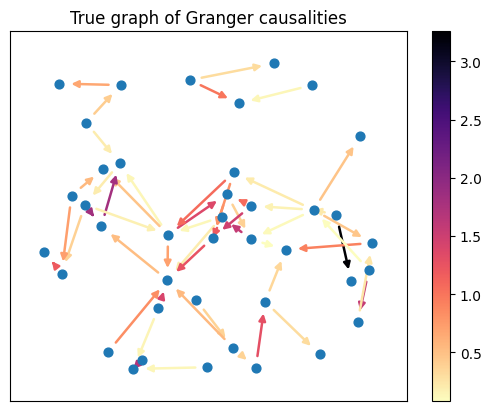

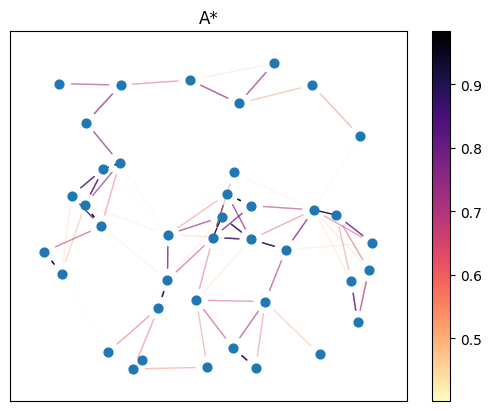

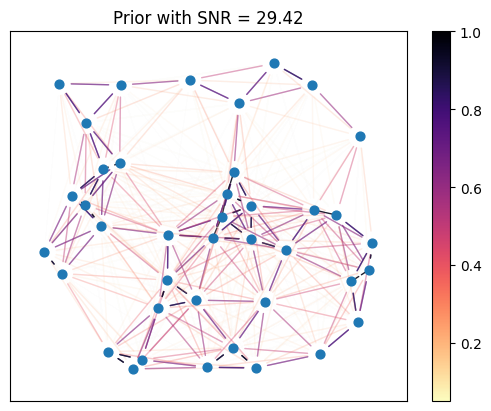

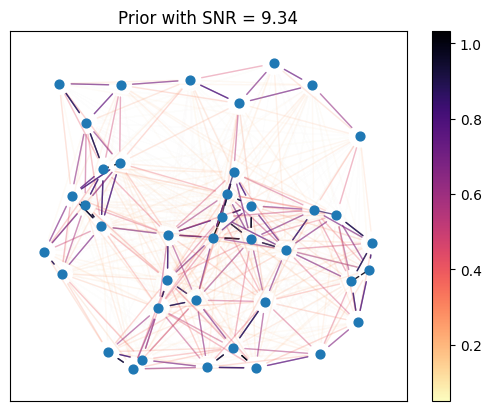

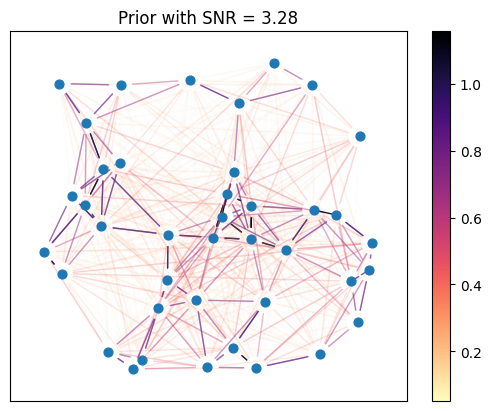

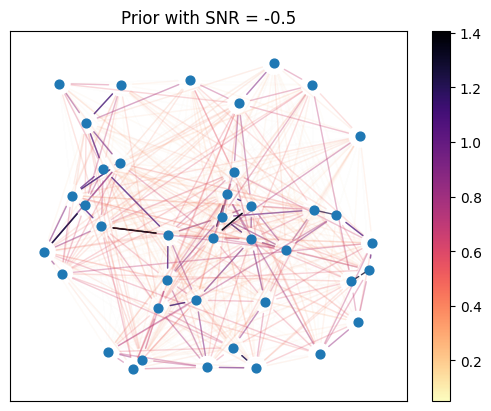

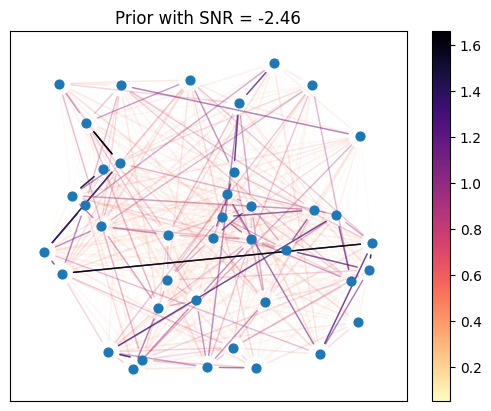

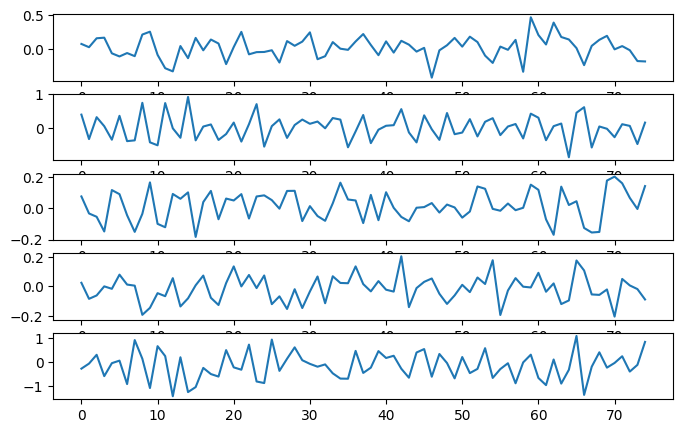

In [11]:
dim = 40
order = 1
thresh = 0.4
thresh_Z = False
delta = 1
mispecified = 0.5
out = 0
size = 40
n_iter = 150
noises_graph = [0.01, 0.1, 0.2, 0.3, 0.4]
noise_var = 0.1

pos, params, priors, A_star, noises_power = generate_stat_model(dim, order,thresh, sigma_noises=noises_graph, mispecified=mispecified, thresh_Z = thresh_Z, out_of_euclidean = out, sigma = 0.6)
synthetic_X = generate_var_signals(2*size, params, order, dim, noise_var)


SNR = [10*np.log10(np.mean(A_star**2)/noise) for noise in noises_power]


plot_granger_graph(params[0], 0.05, 'True graph of Granger causalities')


plot_undirected_graph(A_star, 0.05, "A*")

for i_n, A in enumerate(priors):
    plot_undirected_graph(A, 0.05, f"Prior with SNR = {round(SNR[i_n],2)}")


dims_to_plot = np.random.choice([k for k in range(dim)],5)

X = synthetic_X[5:,dims_to_plot]

plot_X(X.T)

In [14]:
N_step = 15
prior = priors[1]
lbdas = [.0001,.0005,0.001,0.004,0.007,0.01,0.02,0.035,0.05,0.065,0.08,0.1]
n_iter = 150



prior_lasso, error_alasso, i_alasso = cross_val_alasso(synthetic_X[:size], dim, order, size, A+0.001, lbdas, return_errors=True)
lasso_fit_params, error_lasso, i_lasso = cross_val_lasso(synthetic_X[:size], dim, order, size, lbdas, return_errors=True)

lbda = lbdas[i_alasso]
gamma = 10*lbda

fitted_params, Z = alternating_minimization(N_step, prior, lbda, gamma, dim , order, size, synthetic_X, n_iter, history = False)

2023-08-31 10:07:37,268 - WARNING - Default solver failed. Using alternative options. Check solver and solver_stats for more details
2023-08-31 10:07:37,362 - WARNING - Default solver failed. Using alternative options. Check solver and solver_stats for more details
2023-08-31 10:07:37,557 - WARNING - Default solver failed. Using alternative options. Check solver and solver_stats for more details
2023-08-31 10:07:37,865 - WARNING - Default solver failed. Using alternative options. Check solver and solver_stats for more details
2023-08-31 10:07:37,958 - WARNING - Default solver failed. Using alternative options. Check solver and solver_stats for more details
2023-08-31 10:07:38,011 - WARNING - Default solver failed. Using alternative options. Check solver and solver_stats for more details
2023-08-31 10:07:38,066 - WARNING - Default solver failed. Using alternative options. Check solver and solver_stats for more details
2023-08-31 10:07:38,125 - WARNING - Default solver failed. Using alte

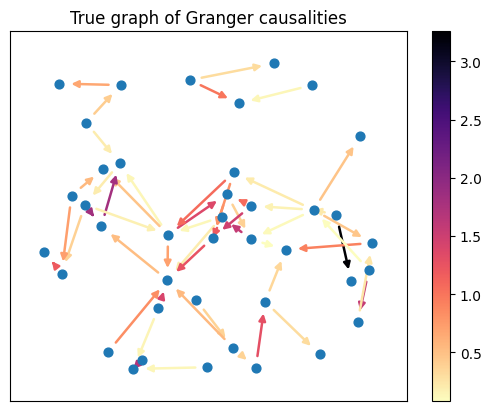

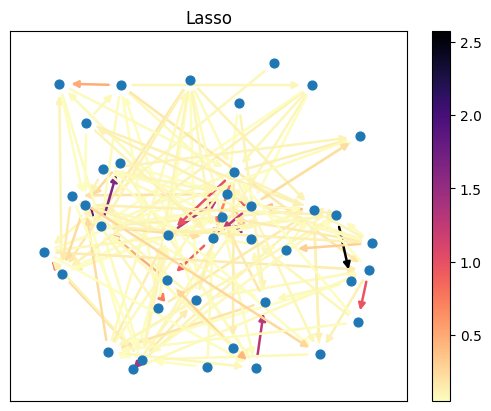

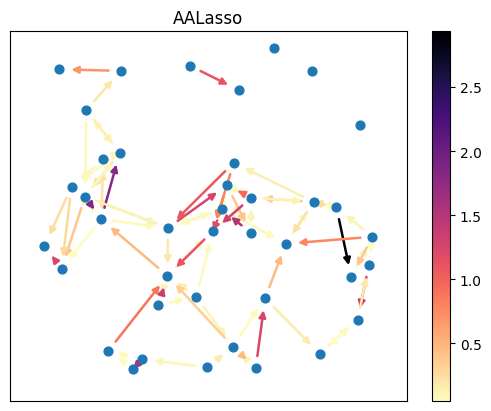

In [16]:
plot_granger_graph(params[0], 0.05, 'True graph of Granger causalities')
plot_granger_graph(lasso_fit_params[0], 0.05, 'Lasso')
plot_granger_graph(fitted_params, 0.05, 'AALasso')